## Loss for FL

In [1]:
import pandas as pd

data = pd.read_csv('/workspace/FL_log/wandb_loss_plot.csv')

In [2]:
data

,Step,misunderstood-valley-29 - _step,misunderstood-valley-29 - _step__MIN,misunderstood-valley-29 - _step__MAX,misunderstood-valley-29 - C6loss,misunderstood-valley-29 - C6loss__MIN,misunderstood-valley-29 - C6loss__MAX,misunderstood-valley-29 - C2loss,misunderstood-valley-29 - C2loss__MIN,misunderstood-valley-29 - C2loss__MAX,...,misunderstood-valley-29 - C7loss__MAX,misunderstood-valley-29 - C5loss,misunderstood-valley-29 - C5loss__MIN,misunderstood-valley-29 - C5loss__MAX,misunderstood-valley-29 - C4loss,misunderstood-valley-29 - C4loss__MIN,misunderstood-valley-29 - C4loss__MAX,misunderstood-valley-29 - C12loss,misunderstood-valley-29 - C12loss__MIN,misunderstood-valley-29 - C12loss__MAX
0,1,333.083333,12,568,8.861201,8.861201,8.861201,8.823471,8.823471,8.823471,...,8.866254,8.966944,8.966944,8.966944,8.938132,8.938132,8.938132,8.816824,8.816824,8.816824
1,2,334.083333,13,569,8.821990,8.821990,8.821990,8.756554,8.756554,8.756554,...,8.898870,8.917085,8.917085,8.917085,8.874677,8.874677,8.874677,8.683569,8.683569,8.683569
2,3,335.083333,14,570,8.758805,8.758805,8.758805,8.629084,8.629084,8.629084,...,8.645407,8.883038,8.883038,8.883038,8.849386,8.849386,8.849386,8.643545,8.643545,8.643545
3,4,336.083333,15,571,8.664521,8.664521,8.664521,8.684683,8.684683,8.684683,...,8.471557,8.658119,8.658119,8.658119,8.781106,8.781106,8.781106,8.463274,8.463274,8.463274
4,5,337.083333,16,572,8.647222,8.647222,8.647222,8.583295,8.583295,8.583295,...,8.228395,8.546686,8.546686,8.546686,8.755456,8.755456,8.755456,8.393069,8.393069,8.393069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2096,17746.000000,17746,17746,0.599382,0.599382,0.599382,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,2097,17747.000000,17747,17747,0.483503,0.483503,0.483503,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,2098,17748.000000,17748,17748,0.519825,0.519825,0.519825,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,2099,17749.000000,17749,17749,0.636073,0.636073,0.636073,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

# Load the data
data = pd.read_csv('/workspace/FL_log/wandb_loss_plot.csv')

# Convert the DataFrame to a dictionary
loss_data = {}
for col in data.columns:
    if 'C' in col and 'loss' in col and not any(x in col for x in ['__MIN', '__MAX']):
        loss_data[col] = data[col].dropna().tolist()


In [6]:
loss_data.keys()

dict_keys(['misunderstood-valley-29 - C6loss', 'misunderstood-valley-29 - C2loss', 'misunderstood-valley-29 - C3loss', 'misunderstood-valley-29 - C8loss', 'misunderstood-valley-29 - C10loss', 'misunderstood-valley-29 - C11loss', 'misunderstood-valley-29 - C9loss', 'misunderstood-valley-29 - C1loss', 'misunderstood-valley-29 - C7loss', 'misunderstood-valley-29 - C5loss', 'misunderstood-valley-29 - C4loss', 'misunderstood-valley-29 - C12loss'])

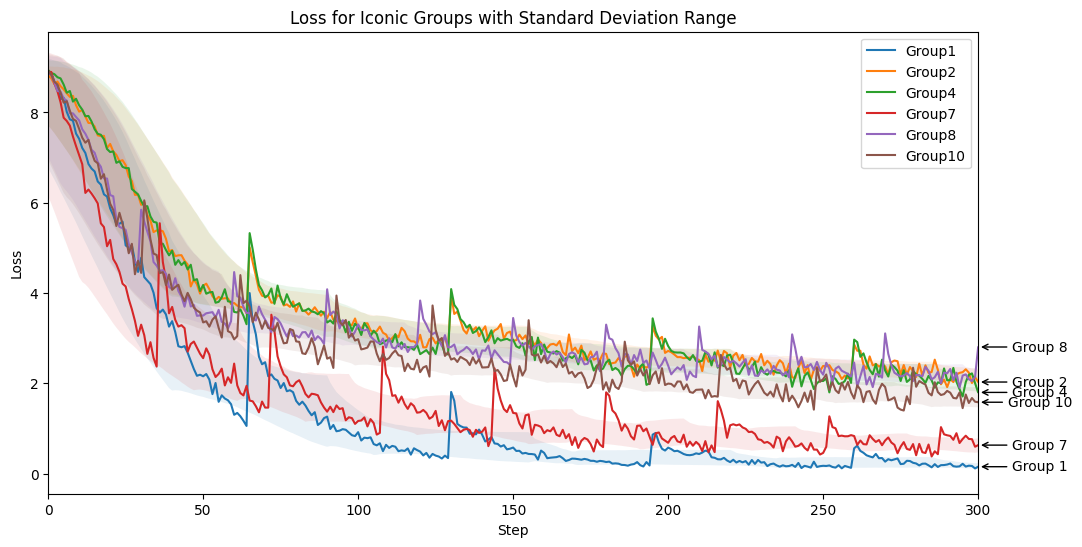

In [113]:
import matplotlib.pyplot as plt
import numpy as np


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


def moving_std(data, window_size):
    half_window = window_size // 2
    return np.array([np.std(data[(i + half_window) - half_window: (i + half_window) + half_window + 1]) for i in range(len(data)-window_size)])


# Prepare the plot
plt.figure(figsize=(12, 6))

# Sort the keys before plotting
sorted_keys = sorted(loss_data.keys(), key=lambda x: int(
    x.split('C')[1].split('loss')[0]))

# Specify the desired groups
desired_groups = {'1', '2', '4', '7', '8', '10'}

# Plot the data
for key in sorted_keys:
    # Extract the group number from the key
    group_num = key.split('C')[1].split('loss')[0]

    if group_num in desired_groups:
        value = loss_data[key]

        # Pad the original data with half window size of the first value
        window_size = 50
        padded_value = np.pad(
            value, (window_size // 2, window_size // 2), mode='edge')

        # Calculate moving average and standard deviation
        moving_avg = moving_average(padded_value, window_size)[:-1]
        std_dev = moving_std(padded_value, window_size)

        plt.plot(value, label=f'Group{group_num}')
        plt.fill_between(range(len(value)), moving_avg -
                         std_dev, moving_avg + std_dev, alpha=0.1)

        # Add arrow and text annotation
        arrow_start = (300, value[300])
        arrow_end = (300 + 20, value[300])
        plt.annotate(f'Group {group_num}', xy=arrow_start, xytext=arrow_end,
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10, ha='center', va='center')

# Configure the plot
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss for Iconic Groups with Standard Deviation Range")
plt.legend()
plt.xlim(0, 300)  # Set the x-axis limit to 0-300 steps


plt.savefig("loss_plot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


## PLot for CLFL

In [33]:
import pandas as pd

file_path = "/workspace/FL_log/wandb_CL_comparison.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Remove __MIN and __MAX columns
df = df.filter(regex='^(?!.*(__MIN|__MAX))')

# Remove the "Step" column
df = df.drop(['Step'], axis=1)

# Extract model names from column headers
models = list(set([col.split(' - ')[0] for col in df.columns]))
models.sort()

# Process each model and store the results in a list
results = []
for model in models:
    print(model)
    # Extract columns related to the current model
    model_cols = [col for col in df.columns if col.startswith(model)]

    # Sort the columns based on the group number
    model_cols.sort(key=lambda x: int(x.split('G')[1].split('EER')[0]))

    model_df = df[model_cols]

    # Remove model name from column headers and rename them to G0EER, G1EER, ..., G11EER
    model_df.columns = [f'G{i}EER' for i in range(12)]

    # Calculate the number of rounds this model was evaluated
    rounds = model_df.shape[0]

    # Create a 2D array with dims [Rounds_this model_evaluated, 12]
    error_rates = model_df.to_numpy().reshape(rounds, 12)

    # Add the error rates to the results list
    results.append(error_rates)



grateful-firefly-17
misunderstood-valley-29
peach-dew-21


In [ ]:
# print numpy array results[0] into a file, need to be complete.
import numpy as np
np.savetxt("tmp.txt", results[0], fmt='%f')


In [34]:
import pandas as pd
import numpy as np


# Process results to remove NaNs and adjust dimensions
adjusted_results = []
for model_data in results:
    # Remove NaNs and reshape the data
    model_data_no_nan = model_data[~np.isnan(model_data)].reshape(-1, 12)
    adjusted_results.append(model_data_no_nan)

# Display the first model's data
# print(adjusted_results[0])


In [40]:
adjusted_results[2].shape

(101, 12)

In [46]:
import numpy as np

# Assuming your original data array has a shape of (61, 12)
data = adjusted_results[0]

# Select the lines 31 to 61
selected_data = data[31:61]

# Generate new data based on the selected_data
new_data = selected_data + np.random.normal(0, 0.01, selected_data.shape)

# Append the new data to the original data array
extended_data = np.vstack((data, new_data))

# Verify the new shape of the extended_data array
print(extended_data.shape)  # Output should be (91, 12)

adjusted_results[0] = extended_data


(91, 12)


In [41]:
adjusted_results[2] = adjusted_results[2][:91]

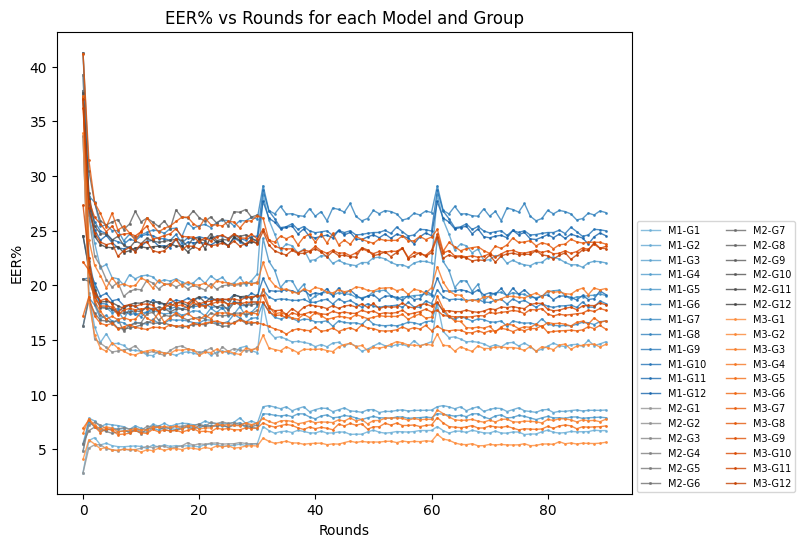

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set up the plot
plt.figure(figsize=(10, 6))

# Define colormaps for each model
colormaps = [cm.Blues, cm.Greys, cm.Oranges]

# Define markers for each model
markers = ['o', 's', 'D']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Get the colormap for the current model
    cmap = colormaps[model_idx]

    # Create a range of colors based on the number of groups (12)
    colors = cmap(np.linspace(0.5, 0.8, 12))

    # Loop through the groups (lines) for each model
    for group_idx in range(12):
        # Extract the data for the current group
        group_data = model_data[:, group_idx]

        # Plot the data with the specified color, marker, and linestyle
        plt.plot(
            group_data,
            color=colors[group_idx],
            marker=markers[model_idx],
            linestyle='-',
            linewidth=1,
            alpha=0.8,
            label=f"M{model_idx+1}-G{group_idx+1}",
            markersize=1,
        )

# Configure plot appearance
plt.xlabel("Rounds")
plt.ylabel("EER%")
plt.title("EER% vs Rounds for each Model and Group")

# Move the legend outside the plot to the right, display it in two columns, and set a smaller fontsize
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.6), ncol=2, fontsize=7)

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()


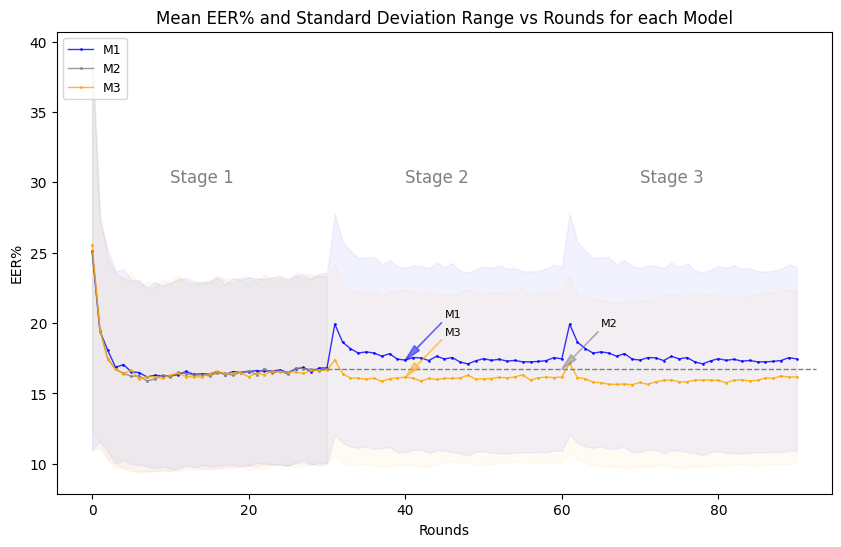

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers for each model
markers = ['o', 's', 'D']

# Define colors for each model
colors = ['blue', 'gray', 'orange']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Calculate the mean and standard deviation for each round
    mean_data = np.mean(model_data, axis=1)
    std_data = np.std(model_data, axis=1)

    # Plot the mean data with the specified color, marker, and linestyle
    plt.plot(
        mean_data,
        color=colors[model_idx],
        marker=markers[model_idx],
        linestyle='-',
        linewidth=1,
        alpha=0.8,
        label=f"M{model_idx+1}",
        markersize=1,
    )

    # Plot the standard deviation range as a shaded area
    plt.fill_between(
        range(len(mean_data)),
        mean_data - std_data,
        mean_data + std_data,
        color=colors[model_idx],
        alpha=0.05,
    )

    # ...
    if model_idx != 1:
        # Add an arrow and text annotation for each model
        plt.annotate(
            f"M{model_idx+1}",
            xy=(40, mean_data[40]),  # Position of the arrow tip
            xytext=(40+5, mean_data[40] + 3),  # Position of the text
            fontsize=8,
            arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
        )
    else:
        # Add an arrow and text annotation for each model
        plt.annotate(
            f"M{model_idx+1}",
            xy=(60, 16.73),  # Position of the arrow tip
            xytext=(60+5, 16.73 + 3),  # Position of the text
            fontsize=8,
            arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
        )        
    # ...
      
# Add text annotations at the specified coordinates with transparency
plt.text(15-5, 30, 'Stage 1', fontsize=12, alpha=0.5)
plt.text(45-5, 30, 'Stage 2', fontsize=12, alpha=0.5)
plt.text(75-5, 30, 'Stage 3', fontsize=12, alpha=0.5)

# Add the gray dashed line at y = 16.73
plt.axhline(y=16.73, color='gray', linestyle='--', linewidth=1, xmin=30/91, xmax=0.98)

# Configure plot appearance
plt.xlabel("Rounds")
plt.ylabel("EER%")
plt.title("Mean EER% and Standard Deviation Range vs Rounds for each Model")

# Add legend
plt.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()



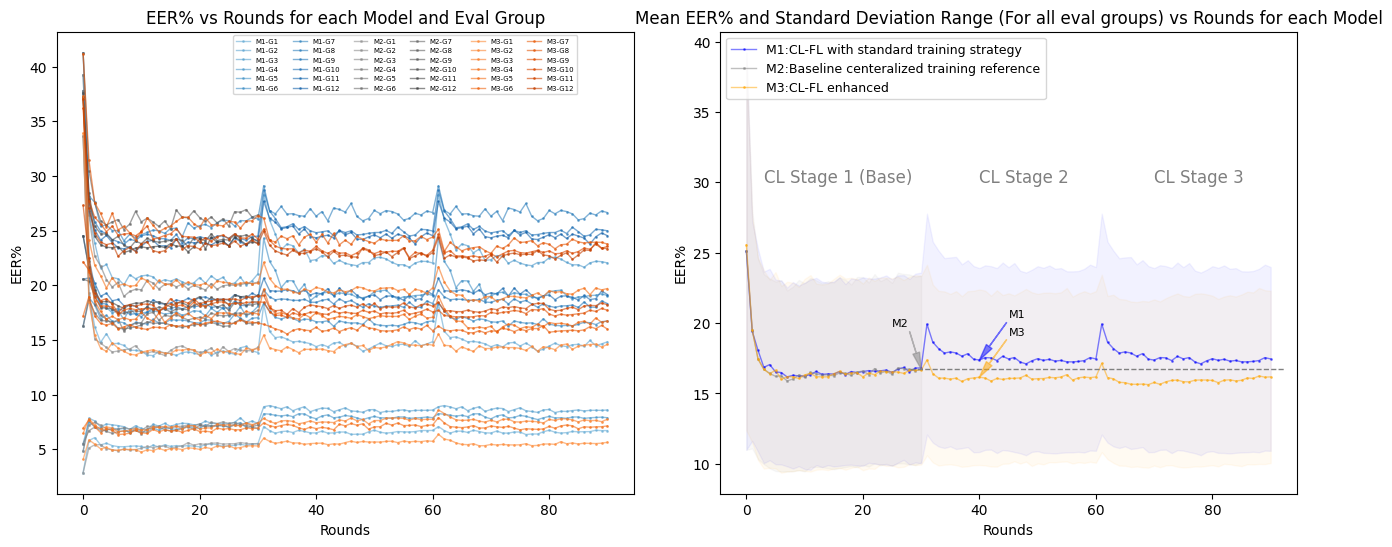

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set up the plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# Plot 1

# Define colormaps for each model
colormaps = [cm.Blues, cm.Greys, cm.Oranges]

# Define markers for each model
markers = ['o', 's', 'D']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Get the colormap for the current model
    cmap = colormaps[model_idx]

    # Create a range of colors based on the number of groups (12)
    colors = cmap(np.linspace(0.5, 0.8, 12))

    # Loop through the groups (lines) for each model
    for group_idx in range(12):
        # Extract the data for the current group
        group_data = model_data[:, group_idx]

        # Plot the data with the specified color, marker, and linestyle
        ax1.plot(
            group_data,
            color=colors[group_idx],
            marker=markers[model_idx],
            linestyle='-',
            linewidth=1,
            alpha=0.6,
            label=f"M{model_idx+1}-G{group_idx+1}",
            markersize=1,
        )

# Configure plot appearance
ax1.set_xlabel("Rounds")
ax1.set_ylabel("EER%")
ax1.set_title("EER% vs Rounds for each Model and Eval Group")

# Move the legend outside the plot to the right, display it in two columns, and set a smaller fontsize
ax1.legend(loc='upper left', bbox_to_anchor=(0.3, 1), ncol=6, fontsize=5)

# Plot 2
# Define markers for each model
markers = ['o', 's', 'D']

# Define colors for each model
colors = ['blue', 'gray', 'orange']

model_label = {0:"M1:CL-FL with standard training strategy", 1:"M2:Baseline centeralized training reference", 2:"M3:CL-FL enhanced"}

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Calculate the mean and standard deviation for each round
    mean_data = np.mean(model_data, axis=1)
    std_data = np.std(model_data, axis=1)

    # Plot the mean data with the specified color, marker, and linestyle
    ax2.plot(
        mean_data,
        color=colors[model_idx],
        marker=markers[model_idx],
        linestyle='-',
        linewidth=1,
        alpha=0.5,
        label=model_label[model_idx],
        markersize=1,
    )

    # Plot the standard deviation range as a shaded area
    ax2.fill_between(
        range(len(mean_data)),
        mean_data - std_data,
        mean_data + std_data,
        color=colors[model_idx],
        alpha=0.05,
    )

    # Add the arrow and text annotation for each model
    if model_idx != 1:
        ax2.annotate(
            f"M{model_idx+1}",
            xy=(40, mean_data[40]),  # Position of the arrow tip
            xytext=(40+5, mean_data[40] + 3),  # Position of the text
            fontsize=8,
            arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
        )
    else:
        ax2.annotate(
            f"M{model_idx+1}",
            xy=(30, 16.73),  # Position of the arrow tip
            xytext=(30-5, 16.73 + 3),  # Position of the text
            fontsize=8,
            arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
        )

# Add text annotations at the specified coordinates with transparency
ax2.text(15 - 12, 30, "CL Stage 1 (Base)", fontsize=12, alpha=0.5)
ax2.text(45 - 5, 30, "CL Stage 2", fontsize=12, alpha=0.5)
ax2.text(75 - 5, 30, "CL Stage 3", fontsize=12, alpha=0.5)

# Add the gray dashed line at y = 16.73
ax2.axhline(y=16.73, color="gray", linestyle="--", linewidth=1, xmin=30 / 91, xmax=0.98)

# Configure plot appearance
ax2.set_xlabel("Rounds")
ax2.set_ylabel("EER%")
ax2.set_title("Mean EER% and Standard Deviation Range (For all eval groups) vs Rounds for each Model")

# Add legend
ax2.legend(loc="upper left", fontsize=9)

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(wspace=0.15)

plt.savefig("figure.pdf", format='pdf', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



## two FL type comp

In [127]:
import pandas as pd

file_path = "/workspace/FL_log/wandb_FL_2t_com.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Remove __MIN and __MAX columns
df = df.filter(regex='^(?!.*(__MIN|__MAX))')

# Remove the "Step" column
df = df.drop(['Step'], axis=1)

# Extract model names from column headers
models = list(set([col.split(' - ')[0] for col in df.columns]))
models.sort()

# Process each model and store the results in a list
results = []
for model in models:
    print(model)
    # Extract columns related to the current model
    model_cols = [col for col in df.columns if col.startswith(model)]

    # Sort the columns based on the group number
    model_cols.sort(key=lambda x: int(x.split('G')[1].split('EER')[0]))

    model_df = df[model_cols]

    # Remove model name from column headers and rename them to G0EER, G1EER, ..., G11EER
    model_df.columns = [f'G{i}EER' for i in range(12)]

    # Calculate the number of rounds this model was evaluated
    rounds = model_df.shape[0]

    # Create a 2D array with dims [Rounds_this model_evaluated, 12]
    error_rates = model_df.to_numpy().reshape(rounds, 12)

    # Add the error rates to the results list
    results.append(error_rates)



lilac-disco-24
misunderstood-valley-29


In [135]:
import pandas as pd
import numpy as np


# Process results to remove NaNs and adjust dimensions
adjusted_results = []
for model_data in results:
    # Remove NaNs and reshape the data
    model_data_no_nan = model_data[~np.isnan(model_data)].reshape(-1, 12)
    adjusted_results.append(model_data_no_nan)

# Display the first model's data
# print(adjusted_results[0])

In [142]:
adjusted_results[0] = adjusted_results[0][:26]
adjusted_results[1] = adjusted_results[1][:26]

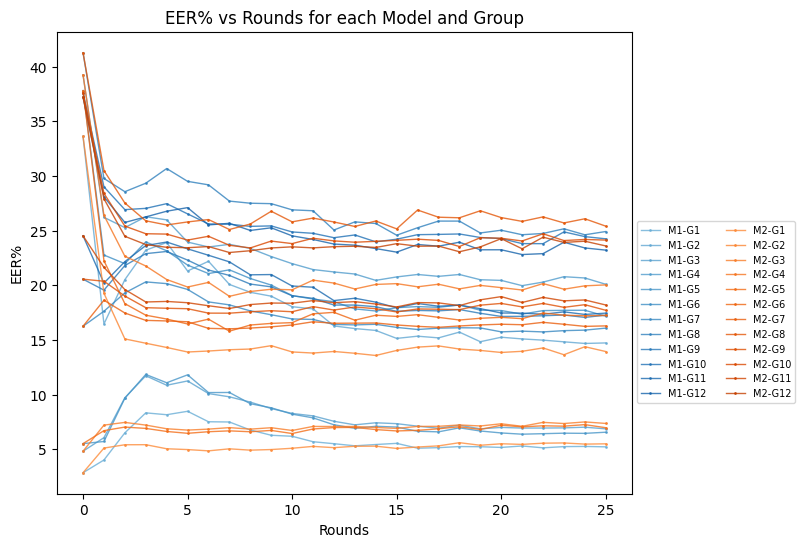

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set up the plot
plt.figure(figsize=(10, 6))

# Define colormaps for each model
colormaps = [cm.Blues, cm.Oranges]

# Define markers for each model
markers = ['o', 'D']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Get the colormap for the current model
    cmap = colormaps[model_idx]

    # Create a range of colors based on the number of groups (12)
    colors = cmap(np.linspace(0.5, 0.8, 12))

    # Loop through the groups (lines) for each model
    for group_idx in range(12):
        # Extract the data for the current group
        group_data = model_data[:, group_idx]

        # Plot the data with the specified color, marker, and linestyle
        plt.plot(
            group_data,
            color=colors[group_idx],
            marker=markers[model_idx],
            linestyle='-',
            linewidth=1,
            alpha=0.8,
            label=f"M{model_idx+1}-G{group_idx+1}",
            markersize=1,
        )

# Configure plot appearance
plt.xlabel("Rounds")
plt.ylabel("EER%")
plt.title("EER% vs Rounds for each Model and Group")

# Move the legend outside the plot to the right, display it in two columns, and set a smaller fontsize
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.6), ncol=2, fontsize=7)

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()


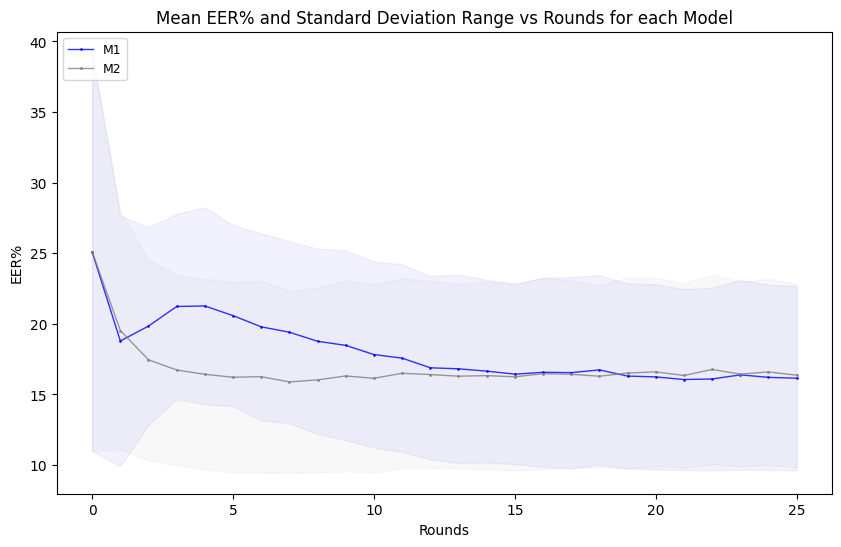

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers for each model
markers = ['o', 's', 'D']

# Define colors for each model
colors = ['blue', 'gray', 'orange']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Calculate the mean and standard deviation for each round
    mean_data = np.mean(model_data, axis=1)
    std_data = np.std(model_data, axis=1)

    # Plot the mean data with the specified color, marker, and linestyle
    plt.plot(
        mean_data,
        color=colors[model_idx],
        marker=markers[model_idx],
        linestyle='-',
        linewidth=1,
        alpha=0.8,
        label=f"M{model_idx+1}",
        markersize=1,
    )

    # Plot the standard deviation range as a shaded area
    plt.fill_between(
        range(len(mean_data)),
        mean_data - std_data,
        mean_data + std_data,
        color=colors[model_idx],
        alpha=0.05,
    )

    # # ...
    # if model_idx != 1:
    #     # Add an arrow and text annotation for each model
    #     plt.annotate(
    #         f"M{model_idx+1}",
    #         xy=(40, mean_data[40]),  # Position of the arrow tip
    #         xytext=(40+5, mean_data[40] + 3),  # Position of the text
    #         fontsize=8,
    #         arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
    #     )
    # else:
    #     # Add an arrow and text annotation for each model
    #     plt.annotate(
    #         f"M{model_idx+1}",
    #         xy=(60, 16.73),  # Position of the arrow tip
    #         xytext=(60+5, 16.73 + 3),  # Position of the text
    #         fontsize=8,
    #         arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
    #     )
    # # ...
      
# # Add text annotations at the specified coordinates with transparency
# plt.text(15-5, 30, 'Stage 1', fontsize=12, alpha=0.5)
# plt.text(45-5, 30, 'Stage 2', fontsize=12, alpha=0.5)
# plt.text(75-5, 30, 'Stage 3', fontsize=12, alpha=0.5)

# # Add the gray dashed line at y = 16.73
# plt.axhline(y=16.73, color='gray', linestyle='--', linewidth=1, xmin=30/91, xmax=0.98)

# Configure plot appearance
plt.xlabel("Rounds")
plt.ylabel("EER%")
plt.title("Mean EER% and Standard Deviation Range vs Rounds for each Model")

# Add legend
plt.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()



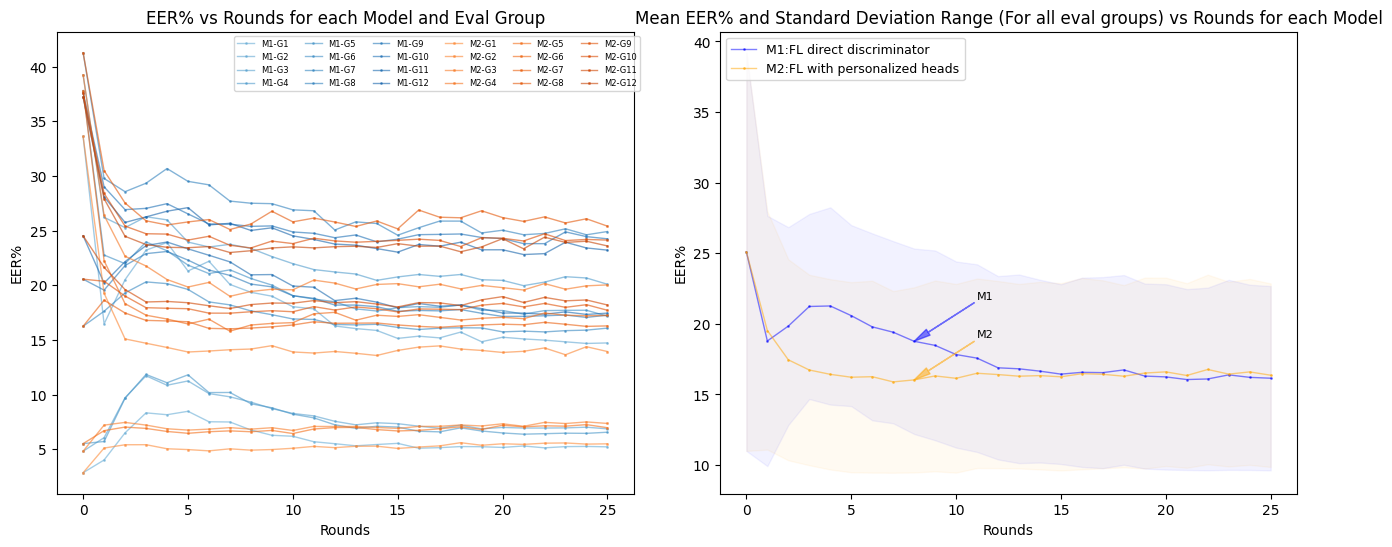

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set up the plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# Plot 1

# Define colormaps for each model
colormaps = [cm.Blues, cm.Oranges]

# Define markers for each model
markers = ['o', 's', 'D']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Get the colormap for the current model
    cmap = colormaps[model_idx]

    # Create a range of colors based on the number of groups (12)
    colors = cmap(np.linspace(0.5, 0.8, 12))

    # Loop through the groups (lines) for each model
    for group_idx in range(12):
        # Extract the data for the current group
        group_data = model_data[:, group_idx]

        # Plot the data with the specified color, marker, and linestyle
        ax1.plot(
            group_data,
            color=colors[group_idx],
            marker=markers[model_idx],
            linestyle='-',
            linewidth=1,
            alpha=0.6,
            label=f"M{model_idx+1}-G{group_idx+1}",
            markersize=1,
        )

# Configure plot appearance
ax1.set_xlabel("Rounds")
ax1.set_ylabel("EER%")
ax1.set_title("EER% vs Rounds for each Model and Eval Group")

# Move the legend outside the plot to the right, display it in two columns, and set a smaller fontsize
ax1.legend(loc='upper left', bbox_to_anchor=(0.3, 1), ncol=6, fontsize=6)

# Plot 2
# Define markers for each model
markers = ['o', 'D']

# Define colors for each model
colors = ['blue', 'orange']

model_label = {0:"M1:FL direct discriminator", 1:"M2:FL with personalized heads"}

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Calculate the mean and standard deviation for each round
    mean_data = np.mean(model_data, axis=1)
    std_data = np.std(model_data, axis=1)

    # Plot the mean data with the specified color, marker, and linestyle
    ax2.plot(
        mean_data,
        color=colors[model_idx],
        marker=markers[model_idx],
        linestyle='-',
        linewidth=1,
        alpha=0.5,
        label=model_label[model_idx],
        markersize=1,
    )

    # Plot the standard deviation range as a shaded area
    ax2.fill_between(
        range(len(mean_data)),
        mean_data - std_data,
        mean_data + std_data,
        color=colors[model_idx],
        alpha=0.05,
    )

    # Add the arrow and text annotation for each model
    ax2.annotate(
        f"M{model_idx+1}",
        xy=(8, mean_data[8]),  # Position of the arrow tip
        xytext=(8+3, mean_data[8] + 3),  # Position of the text
        fontsize=8,
        arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
    )


# # Add text annotations at the specified coordinates with transparency
# ax2.text(15 - 12, 30, "CL Stage 1 (Base)", fontsize=12, alpha=0.5)
# ax2.text(45 - 5, 30, "CL Stage 2", fontsize=12, alpha=0.5)
# ax2.text(75 - 5, 30, "CL Stage 3", fontsize=12, alpha=0.5)

# # Add the gray dashed line at y = 16.73
# ax2.axhline(y=16.73, color="gray", linestyle="--", linewidth=1, xmin=30 / 91, xmax=0.98)

# Configure plot appearance
ax2.set_xlabel("Rounds")
ax2.set_ylabel("EER%")
ax2.set_title("Mean EER% and Standard Deviation Range (For all eval groups) vs Rounds for each Model")

# Add legend
ax2.legend(loc="upper left", fontsize=9)

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(wspace=0.15)

plt.savefig("figure.pdf", format='pdf', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


## FL vs Indv comp

In [152]:
import pandas as pd

file_path = "/workspace/FL_log/wandb_FL_Indv_comp.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Remove __MIN and __MAX columns
df = df.filter(regex='^(?!.*(__MIN|__MAX))')

# Remove the "Step" column
df = df.drop(['Step'], axis=1)

# Extract model names from column headers
models = list(set([col.split(' - ')[0] for col in df.columns]))
models.sort()

# Process each model and store the results in a list
results = []
for model in models:
    print(model)
    # Extract columns related to the current model
    model_cols = [col for col in df.columns if col.startswith(model)]

    # Sort the columns based on the group number
    model_cols.sort(key=lambda x: int(x.split('G')[1].split('EER')[0]))

    model_df = df[model_cols]

    # Remove model name from column headers and rename them to G0EER, G1EER, ..., G11EER
    model_df.columns = [f'G{i}EER' for i in range(12)]

    # Calculate the number of rounds this model was evaluated
    rounds = model_df.shape[0]

    # Create a 2D array with dims [Rounds_this model_evaluated, 12]
    error_rates = model_df.to_numpy().reshape(rounds, 12)

    # Add the error rates to the results list
    results.append(error_rates)



decent-capybara-7
misunderstood-valley-29


In [153]:
import pandas as pd
import numpy as np


# Process results to remove NaNs and adjust dimensions
adjusted_results = []
for model_data in results:
    # Remove NaNs and reshape the data
    model_data_no_nan = model_data[~np.isnan(model_data)].reshape(-1, 12)
    adjusted_results.append(model_data_no_nan)

# Display the first model's data
# print(adjusted_results[0])

In [154]:
adjusted_results[0] = adjusted_results[0][:26]
adjusted_results[1] = adjusted_results[1][:26]

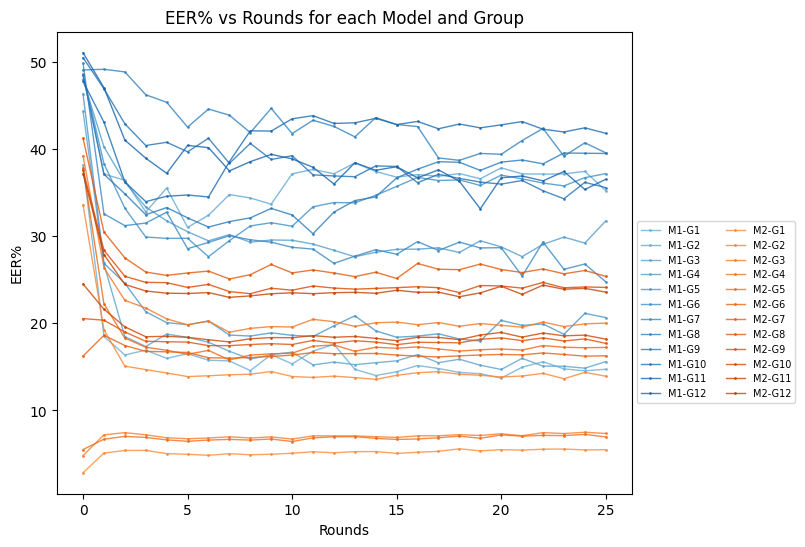

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set up the plot
plt.figure(figsize=(10, 6))

# Define colormaps for each model
colormaps = [cm.Blues, cm.Oranges]

# Define markers for each model
markers = ['o', 'D']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Get the colormap for the current model
    cmap = colormaps[model_idx]

    # Create a range of colors based on the number of groups (12)
    colors = cmap(np.linspace(0.5, 0.8, 12))

    # Loop through the groups (lines) for each model
    for group_idx in range(12):
        # Extract the data for the current group
        group_data = model_data[:, group_idx]

        # Plot the data with the specified color, marker, and linestyle
        plt.plot(
            group_data,
            color=colors[group_idx],
            marker=markers[model_idx],
            linestyle='-',
            linewidth=1,
            alpha=0.8,
            label=f"M{model_idx+1}-G{group_idx+1}",
            markersize=1,
        )

# Configure plot appearance
plt.xlabel("Rounds")
plt.ylabel("EER%")
plt.title("EER% vs Rounds for each Model and Group")

# Move the legend outside the plot to the right, display it in two columns, and set a smaller fontsize
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.6), ncol=2, fontsize=7)

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()


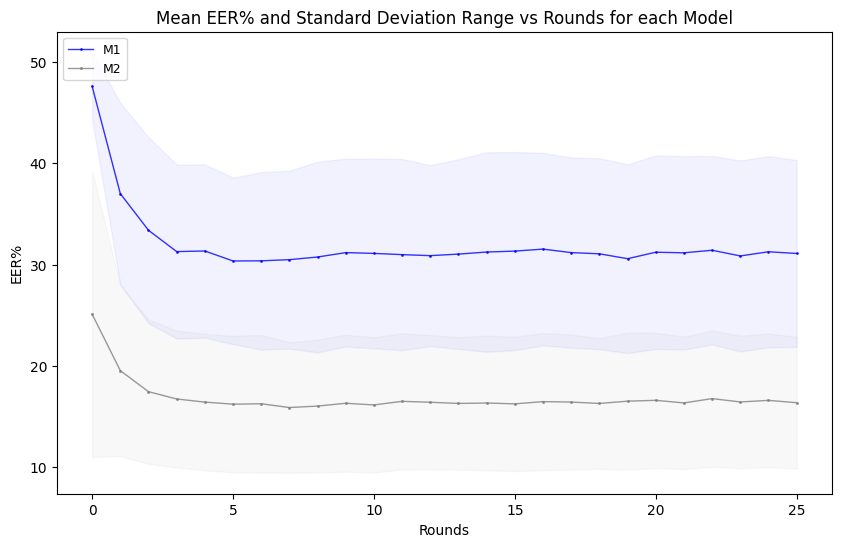

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers for each model
markers = ['o', 's', 'D']

# Define colors for each model
colors = ['blue', 'gray', 'orange']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Calculate the mean and standard deviation for each round
    mean_data = np.mean(model_data, axis=1)
    std_data = np.std(model_data, axis=1)

    # Plot the mean data with the specified color, marker, and linestyle
    plt.plot(
        mean_data,
        color=colors[model_idx],
        marker=markers[model_idx],
        linestyle='-',
        linewidth=1,
        alpha=0.8,
        label=f"M{model_idx+1}",
        markersize=1,
    )

    # Plot the standard deviation range as a shaded area
    plt.fill_between(
        range(len(mean_data)),
        mean_data - std_data,
        mean_data + std_data,
        color=colors[model_idx],
        alpha=0.05,
    )

    # # ...
    # if model_idx != 1:
    #     # Add an arrow and text annotation for each model
    #     plt.annotate(
    #         f"M{model_idx+1}",
    #         xy=(40, mean_data[40]),  # Position of the arrow tip
    #         xytext=(40+5, mean_data[40] + 3),  # Position of the text
    #         fontsize=8,
    #         arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
    #     )
    # else:
    #     # Add an arrow and text annotation for each model
    #     plt.annotate(
    #         f"M{model_idx+1}",
    #         xy=(60, 16.73),  # Position of the arrow tip
    #         xytext=(60+5, 16.73 + 3),  # Position of the text
    #         fontsize=8,
    #         arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
    #     )
    # # ...
      
# # Add text annotations at the specified coordinates with transparency
# plt.text(15-5, 30, 'Stage 1', fontsize=12, alpha=0.5)
# plt.text(45-5, 30, 'Stage 2', fontsize=12, alpha=0.5)
# plt.text(75-5, 30, 'Stage 3', fontsize=12, alpha=0.5)

# # Add the gray dashed line at y = 16.73
# plt.axhline(y=16.73, color='gray', linestyle='--', linewidth=1, xmin=30/91, xmax=0.98)

# Configure plot appearance
plt.xlabel("Rounds")
plt.ylabel("EER%")
plt.title("Mean EER% and Standard Deviation Range vs Rounds for each Model")

# Add legend
plt.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()



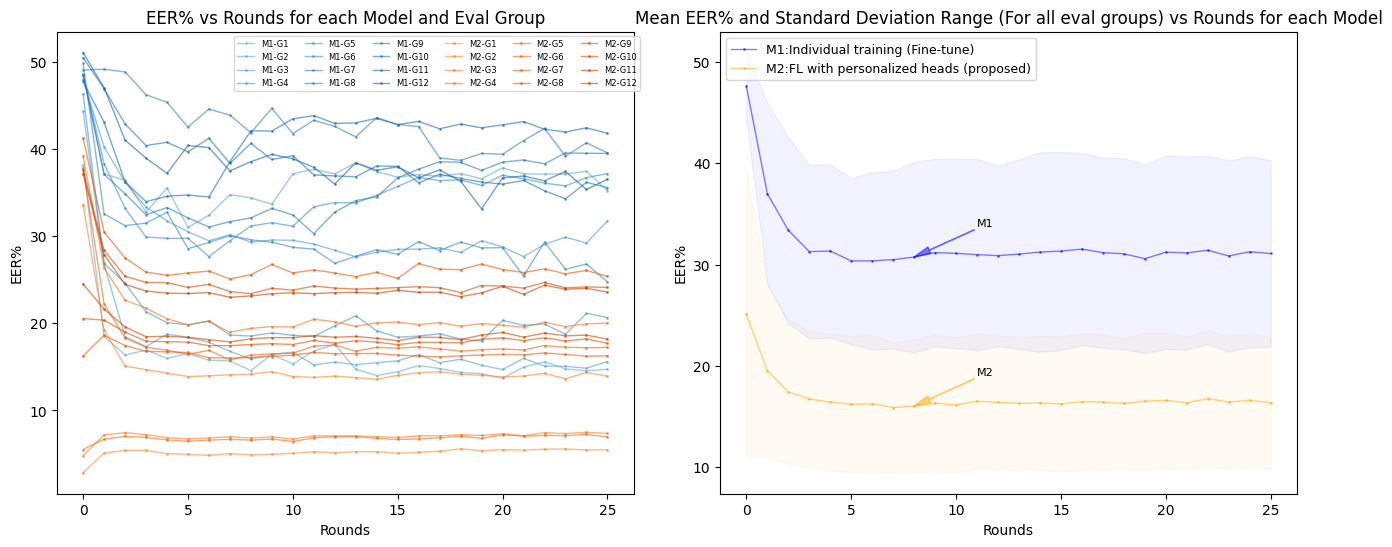

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set up the plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# Plot 1

# Define colormaps for each model
colormaps = [cm.Blues, cm.Oranges]

# Define markers for each model
markers = ['o', 's', 'D']

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Get the colormap for the current model
    cmap = colormaps[model_idx]

    # Create a range of colors based on the number of groups (12)
    colors = cmap(np.linspace(0.5, 0.8, 12))

    # Loop through the groups (lines) for each model
    for group_idx in range(12):
        # Extract the data for the current group
        group_data = model_data[:, group_idx]

        # Plot the data with the specified color, marker, and linestyle
        ax1.plot(
            group_data,
            color=colors[group_idx],
            marker=markers[model_idx],
            linestyle='-',
            linewidth=1,
            alpha=0.6,
            label=f"M{model_idx+1}-G{group_idx+1}",
            markersize=1,
        )

# Configure plot appearance
ax1.set_xlabel("Rounds")
ax1.set_ylabel("EER%")
ax1.set_title("EER% vs Rounds for each Model and Eval Group")

# Move the legend outside the plot to the right, display it in two columns, and set a smaller fontsize
ax1.legend(loc='upper left', bbox_to_anchor=(0.3, 1), ncol=6, fontsize=6)

# Plot 2
# Define markers for each model
markers = ['o', 'D']

# Define colors for each model
colors = ['blue', 'orange']

model_label = {0:"M1:Individual training (Fine-tune)", 1:"M2:FL with personalized heads (proposed)"}

# Loop through the models and their data
for model_idx, model_data in enumerate(adjusted_results):
    # Calculate the mean and standard deviation for each round
    mean_data = np.mean(model_data, axis=1)
    std_data = np.std(model_data, axis=1)

    # Plot the mean data with the specified color, marker, and linestyle
    ax2.plot(
        mean_data,
        color=colors[model_idx],
        marker=markers[model_idx],
        linestyle='-',
        linewidth=1,
        alpha=0.5,
        label=model_label[model_idx],
        markersize=1,
    )

    # Plot the standard deviation range as a shaded area
    ax2.fill_between(
        range(len(mean_data)),
        mean_data - std_data,
        mean_data + std_data,
        color=colors[model_idx],
        alpha=0.05,
    )

    # Add the arrow and text annotation for each model
    ax2.annotate(
        f"M{model_idx+1}",
        xy=(8, mean_data[8]),  # Position of the arrow tip
        xytext=(8+3, mean_data[8] + 3),  # Position of the text
        fontsize=8,
        arrowprops=dict(facecolor=colors[model_idx], edgecolor=colors[model_idx], alpha=0.5, width=0.15, headwidth=5),
    )


# # Add text annotations at the specified coordinates with transparency
# ax2.text(15 - 12, 30, "CL Stage 1 (Base)", fontsize=12, alpha=0.5)
# ax2.text(45 - 5, 30, "CL Stage 2", fontsize=12, alpha=0.5)
# ax2.text(75 - 5, 30, "CL Stage 3", fontsize=12, alpha=0.5)

# # Add the gray dashed line at y = 16.73
# ax2.axhline(y=16.73, color="gray", linestyle="--", linewidth=1, xmin=30 / 91, xmax=0.98)

# Configure plot appearance
ax2.set_xlabel("Rounds")
ax2.set_ylabel("EER%")
ax2.set_title("Mean EER% and Standard Deviation Range (For all eval groups) vs Rounds for each Model")

# Add legend
ax2.legend(loc="upper left", fontsize=9)

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(wspace=0.15)

plt.savefig("figure.pdf", format='pdf', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


## Make continous learning plot